# Import Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification

n_classes = 3
#df = pd.read_csv('data.csv')

#X = df.iloc[:,:-1].values
#Y = df.iloc[:,-1].values
X, Y = make_classification(n_samples=2000, n_features=10, n_classes=n_classes, n_informative=3)

---------------

# Visualize

In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

x_pca = PCA(n_components=2).fit_transform(X)
x_tsne = TSNE(n_components=2).fit_transform(X)

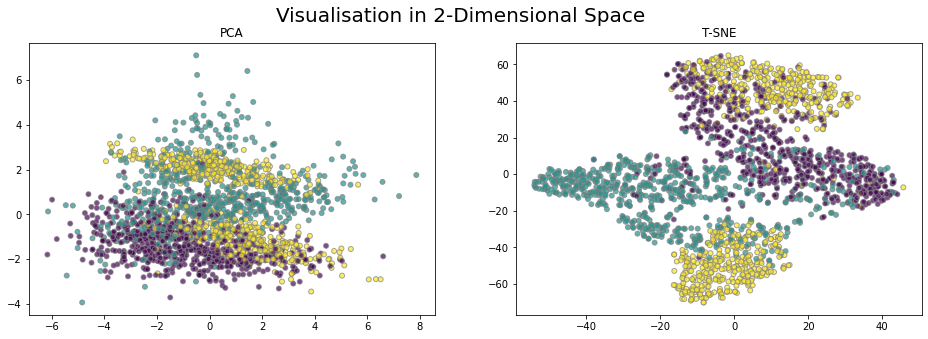

In [3]:
plot_para ={'alpha':0.7, 'cmap':'viridis', 'edgecolors':'grey', 's':25}

fig, axes = plt.subplots(1,2, figsize=(16,5))
fig.suptitle('Visualisation in 2-Dimensional Space', fontsize=20)
axes[0].scatter(x_pca[:,0], x_pca[:,1], c=Y, **plot_para)
axes[0].set_title('PCA')
axes[1].scatter(x_tsne[:,0], x_tsne[:,1], c=Y, **plot_para)
axes[1].set_title('T-SNE')
plt.show()

-----------

# Classification

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

## Cross-validation

In [5]:
from sklearn.model_selection import StratifiedKFold

seed = 10

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=seed)

## KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

### Performance on cross-validation

In [7]:
cvscores_knn = []

for train, test in kfold.split(X, Y):
    x_train = sc.fit_transform(X[train])
    x_test = sc.fit_transform(X[test])
    knn.fit(x_train, Y[train])
    score = np.round(knn.score(x_test, Y[test]), decimals=3)
    cvscores_knn.append(score)
    print(score*100)

80.10000000000001
81.10000000000001
81.8


### ROC

**OVA 1 vs all**

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [9]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range (n_classes):
    y_FirstVsAll = Y.copy()
    y_FirstVsAll = (y_FirstVsAll == i).astype(int)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y_FirstVsAll, test_size=0.25, random_state=42)

    scaled_x_train = sc.fit_transform(x_train)
    scaled_x_test = sc.fit_transform(x_test)

    knn.fit(scaled_x_train, y_train)
    y_predict = knn.predict_proba(x_test)

    fpr[i], tpr[i], _ = roc_curve(y_test, y_predict[:,1])
    roc_auc[i] = auc(fpr[i], tpr[i])

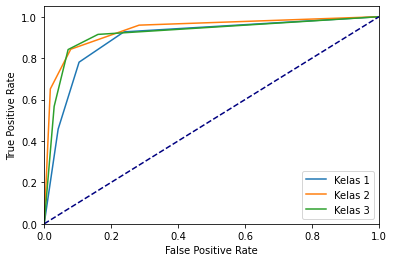

In [14]:
#args = {'color':'orange', 'lw':1}

plt.figure()
#lw = 2
#for i in range (n_classes):
plt.plot(fpr[0], tpr[0], label='Kelas 1')
plt.plot(fpr[1], tpr[1], label='Kelas 2')
plt.plot(fpr[2], tpr[2], label='Kelas 3')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [11]:
np.array([roc_auc[k] for k in roc_auc]).mean()

0.9178948587139525

$$AUC \approx 0.92$$